In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Histograms

In [2]:
marks = [88, 48, 60, 51, 57, 85, 69, 75, 97, 72, 71, 79, 65, 63, 73]

In [27]:
sum(marks)/len(marks)

70.2

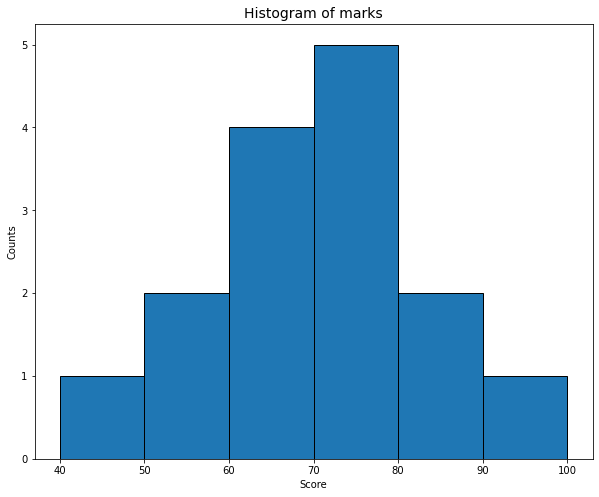

In [9]:
plt.figure(figsize=(10,8))
plt.hist(marks, bins=[40, 50, 60, 70, 80, 90, 100], edgecolor = 'k')
plt.xlabel("Score")
plt.ylabel("Counts")
plt.title("Histogram of marks", fontsize=14)
plt.show()

In [10]:
data = pd.read_csv("./weight-height.csv")

In [11]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
heights = data.sample(frac=0.5,random_state=2000)['Height'].values

In [17]:
heights

array([67.79647715, 67.99745599, 63.57711788, ..., 63.68308288,
       59.54661182, 72.09890444])

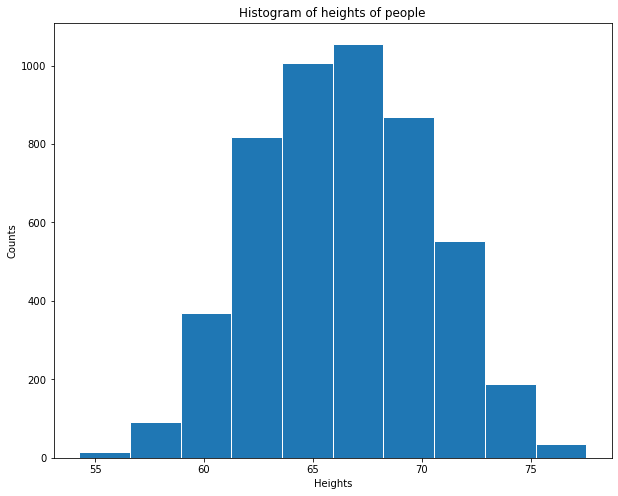

In [24]:
plt.figure(figsize=(10,8))
plt.hist(heights, edgecolor='w')
plt.xlabel("Heights")
plt.ylabel("Counts")
plt.title("Histogram of heights of people")
plt.show()

In [21]:
heights.mean()

66.35273089114408

In [22]:
weights = data.sample(frac=0.5, random_state=2345)['Weight'].values

In [23]:
weights

array([162.47595732, 119.77854056, 192.76558097, ..., 137.95856477,
       156.62454971, 134.33174641])

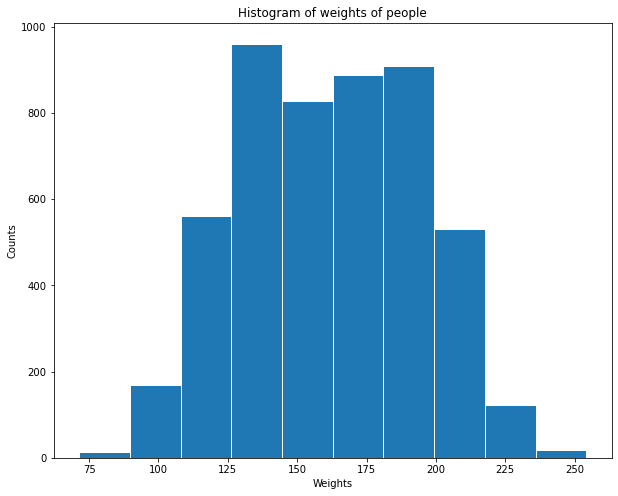

In [25]:
plt.figure(figsize=(10,8))
plt.hist(weights, edgecolor='w')
plt.xlabel("Weights")
plt.ylabel("Counts")
plt.title("Histogram of weights of people")
plt.show()

In [26]:
weights.mean()

161.83844840871794

## Measure of central tendency

### Mean

In [28]:
def average_value(X):
    values = list(X)
    n = len(values)  # total number of observations
    return sum(values)/n

In [29]:
average_value(weights)

161.83844840871785

### Mode

In [31]:
import statistics as stat

In [33]:
stat.mode(weights)

162.475957317792

In [34]:
stat.mode(heights)

67.796477151995

In [35]:
sorted([3, 1, -2, 5, 2])

[-2, 1, 2, 3, 5]

### Median

In [36]:
def find_median(X):
    values = sorted(list(X))
    n = len(values)
    if n % 2 != 0:
        return values[(n-1)//2]
    else:
        return 0.5*(values[(n-1)//2]+values[(1+ (n-1)//2)])

In [38]:
find_median([3, 1, -2, 5, 2, 7])

2.5

## Measure of Dispersion

### range

In [40]:
def calc_range(X):
    X = list(X)
    return max(X) - min(X)

In [60]:
values = np.random.randint(20, 70, 1000)

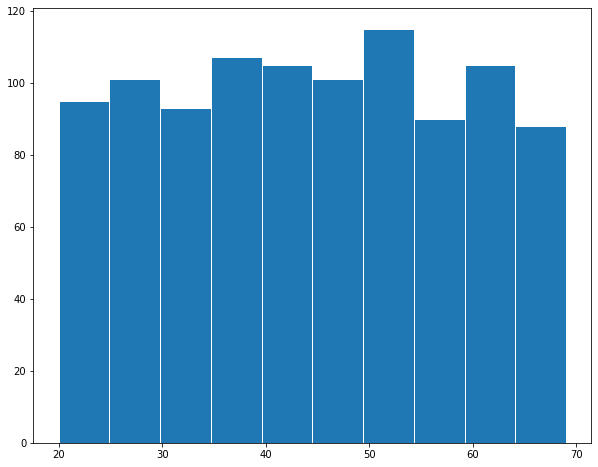

In [61]:
plt.figure(figsize=(10,8))
plt.hist(values, edgecolor='w')
plt.show()

In [62]:
values = np.hstack((values, np.array([500])))

In [63]:
calc_range(values)

480

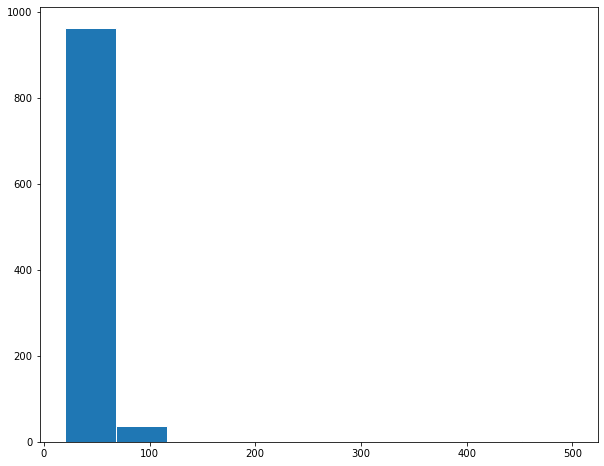

In [64]:
plt.figure(figsize=(10,8))
plt.hist(values, edgecolor='w')
plt.show()

The `range`, though easily computed is basically very much prone to outliers and it doesn't decribe the dispersion (how the data is distributed around the mean) properly.

### Variance and Standard deviation

In [65]:
values = np.random.randint(10,50,200)

In [72]:
values

array([17, 39, 30, 49, 16, 20, 10, 17, 49, 12, 27, 41, 35, 24, 13, 37, 21,
       27, 11, 36, 34, 18, 48, 23, 45, 10, 29, 43, 13, 34, 20, 28, 20, 42,
       45, 49, 15, 49, 10, 31, 39, 15, 24, 17, 30, 45, 40, 29, 16, 42, 19,
       42, 25, 20, 41, 17, 38, 26, 24, 40, 25, 14, 44, 25, 36, 11, 46, 46,
       36, 16, 35, 13, 13, 38, 24, 10, 39, 12, 16, 19, 34, 20, 43, 16, 32,
       40, 41, 41, 19, 47, 47, 46, 12, 49, 17, 43, 22, 44, 10, 38, 15, 24,
       39, 29, 15, 36, 11, 42, 49, 40, 40, 38, 40, 11, 34, 47, 33, 44, 36,
       30, 16, 12, 31, 31, 37, 35, 48, 12, 10, 48, 36, 35, 26, 35, 46, 21,
       35, 46, 36, 30, 38, 17, 27, 22, 45, 35, 32, 34, 10, 33, 15, 33, 24,
       32, 46, 30, 12, 10, 29, 26, 22, 18, 15, 43, 15, 43, 42, 20, 49, 42,
       43, 40, 39, 20, 43, 36, 36, 40, 42, 34, 26, 48, 44, 47, 41, 12, 11,
       48, 47, 47, 47, 47, 24, 44, 49, 31, 27, 10, 26, 11])

In [66]:
values.std()  # standard deviation

12.380620945655352

In [67]:
values.var()  # variance

153.279775

In [70]:
def std_dev(X):
    mean_x = average_value(X)
    squared_diff = [(v - mean_x)**2 for v in X]
    variance = sum(squared_diff) / len(squared_diff)
    return variance**0.5

In [71]:
std_dev(values)

12.380620945655348

### Coefficient of Variation

In [73]:
def coeff_of_variation(X):
    mean_x = average_value(X)
    std_x = std_dev(X)
    return std_x/mean_x

In [74]:
coeff_of_variation(values)

0.4057224625808733

In [75]:
def gen_numbers(m=0, s=1, n=100):
    values = np.random.randn(n)
    values = values * s + m
    return values

In [80]:
value1 = gen_numbers(10, 2, 1000)

In [84]:
value2 = gen_numbers(10, 0.4, 1000)

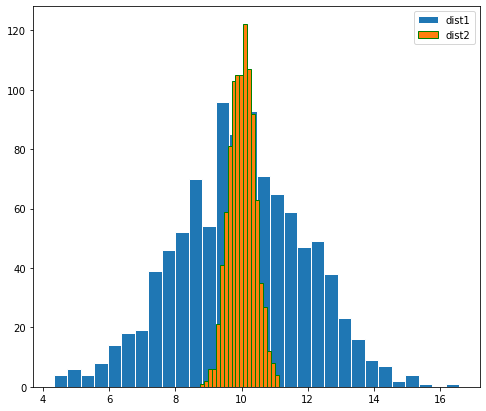

In [87]:
plt.figure(figsize=(8,7))
plt.hist(value1, bins=30, edgecolor='w', label='dist1')
plt.hist(value2, bins=20, edgecolor='g', label='dist2')
plt.legend()
plt.show()

In [89]:
value1.mean()

9.977930735306458

In [90]:
value2.mean()

10.01477697895741

In [91]:
value1.std()

1.9580364071989382

In [92]:
value2.std()

0.38850709296512875

### Inter - Quatile Range (IQR) and boxplot

In [96]:
def IQR(X):
    quantiles = stat.quantiles(X)
    iqr = quantiles[2] - quantiles[0]
    return iqr

In [98]:
values

array([17, 39, 30, 49, 16, 20, 10, 17, 49, 12, 27, 41, 35, 24, 13, 37, 21,
       27, 11, 36, 34, 18, 48, 23, 45, 10, 29, 43, 13, 34, 20, 28, 20, 42,
       45, 49, 15, 49, 10, 31, 39, 15, 24, 17, 30, 45, 40, 29, 16, 42, 19,
       42, 25, 20, 41, 17, 38, 26, 24, 40, 25, 14, 44, 25, 36, 11, 46, 46,
       36, 16, 35, 13, 13, 38, 24, 10, 39, 12, 16, 19, 34, 20, 43, 16, 32,
       40, 41, 41, 19, 47, 47, 46, 12, 49, 17, 43, 22, 44, 10, 38, 15, 24,
       39, 29, 15, 36, 11, 42, 49, 40, 40, 38, 40, 11, 34, 47, 33, 44, 36,
       30, 16, 12, 31, 31, 37, 35, 48, 12, 10, 48, 36, 35, 26, 35, 46, 21,
       35, 46, 36, 30, 38, 17, 27, 22, 45, 35, 32, 34, 10, 33, 15, 33, 24,
       32, 46, 30, 12, 10, 29, 26, 22, 18, 15, 43, 15, 43, 42, 20, 49, 42,
       43, 40, 39, 20, 43, 36, 36, 40, 42, 34, 26, 48, 44, 47, 41, 12, 11,
       48, 47, 47, 47, 47, 24, 44, 49, 31, 27, 10, 26, 11])

In [99]:
IQR(values)

22.75

In [100]:
stat.quantiles(values)

[19.0, 32.5, 41.75]

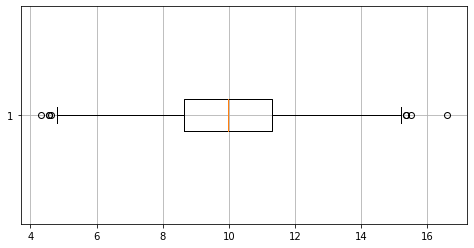

In [107]:
plt.figure(figsize=(8,4))
plt.boxplot(value1, vert = False)
plt.grid()
plt.show()